In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Lies `startups.csv` in einen DataFrame

In [38]:
st = pd.read_csv("./data/startups.csv")

In [39]:
st.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

## Training

* One Hot Encode `State`
* Verwende 20% Testdaten und `random_state=42`
* Predicte `Profit`
* Analysiere die Koeffizienten des Modells und vergleiche mit den Korrelationskoeffizienten

In [40]:
st = pd.get_dummies(st, columns=["State"], drop_first=True)

In [41]:
X = st.drop("Profit", axis=1)
y = st["Profit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8987266414328636

In [43]:
importances = pd.DataFrame(data=model.coef_, index=X_train.columns)
importances

0
R&D Spend          0.805630
Administration    -0.068788
Marketing Spend    0.029855
State_Florida    938.793006
State_New York     6.987760

In [44]:
st.corr()["Profit"].drop("Profit")

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
State_Florida      0.116244
State_New York     0.031368
Name: Profit, dtype: float64

## Evaluierung

* Stelle die Verteilung der Fehler in einem `distplot` dar

/home/krane/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

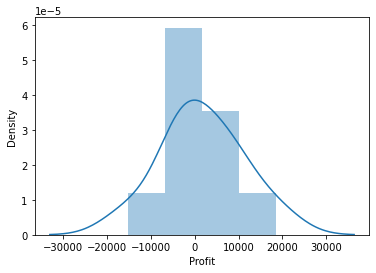

In [45]:
predictions = model.predict(X_test)
sns.distplot((y_test - predictions))